### Домашнее задание к лекции «Корреляция и корреляционный анализ»

#### Задание 1.  
https://www.kaggle.com/ukveteran/mortality-and-water-hardness  
Ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?  
- Построить точечный график  
- Рассчитать коэффициенты корреляции Пирсона и Спирмена  
- Построить модель линейной регрессии  
- Рассчитать коэффициент детерминации  
- Вывести график остатков

In [81]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
df = pd.read_csv('water.csv', sep = ',')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [160]:
df.shape

(61, 5)

In [161]:
df.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


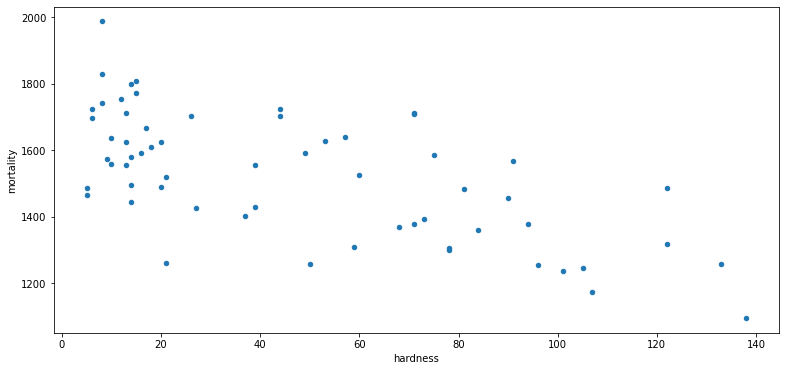

In [165]:
# а. Построить точечный график
df.plot(kind='scatter', x='hardness', y='mortality')

Судя по расположению точек на графике между смертностью и жесткостью воды есть линейная обратная линейная связь.  

In [166]:
# Рассчитать коэффициенты корреляции Пирсона и Спирмена
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [167]:
df[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [168]:
# Построить модель линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [169]:
X = df[['hardness']]
y = df[['mortality']]

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [171]:
X_test.shape

(16, 1)

In [172]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f'k1 = {model.coef_[0][0]}, b = {model.intercept_[0]}')

k1 = -2.8161941542862348, b = 1647.286235992023


In [173]:
# Рассчитать коэффициент детерминации
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.46765994998743676

In [174]:
# Вывести график остатков
residuals = y_test - y_pred

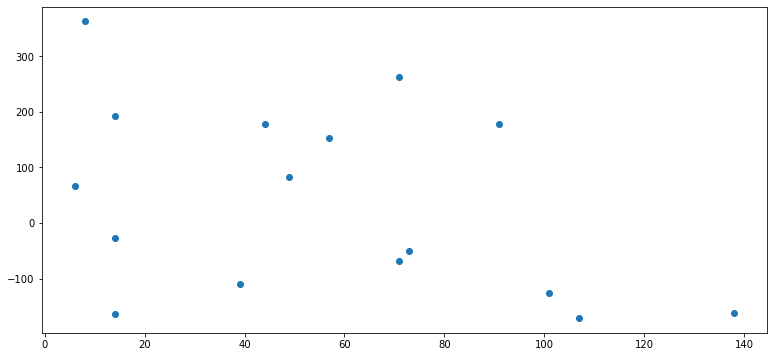

In [175]:
plt.scatter(X_test, residuals)

По графику остатков можно сказать, что модель подобрана правильно так как:
- остатки ведут себя достаточно хаотично (хотя, разброс в положительной области больше, чем в отрицательной)  
- в остатках нет систематической составляющей  
- в чередовании знаков нет закономерностей. Так как данных мало, можно посчитать количество положительных и отрицательных значений. Их оказалось ровно поровну - 8.

#### Задание 2.  
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?  
- Разделить данные на 2 группы  
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [190]:
df_south = df[df['location'] == 'South']
df_south.shape

(26, 5)

In [191]:
df_north = df[df['location'] == 'North']
df_north.shape

(35, 5)

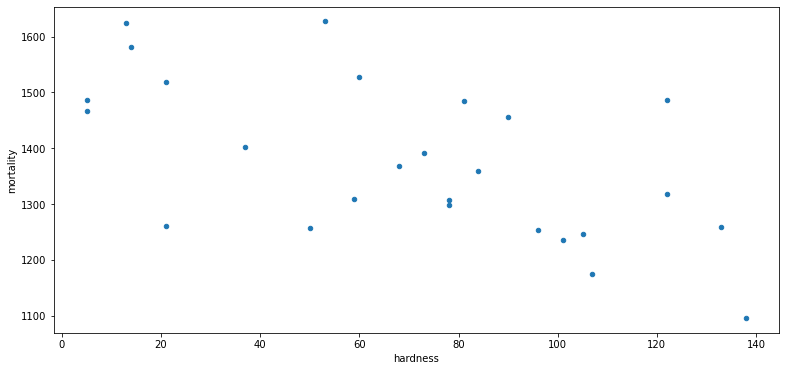

In [192]:
# а. Построить точечный график
df_south.plot(kind='scatter', x='hardness', y='mortality')

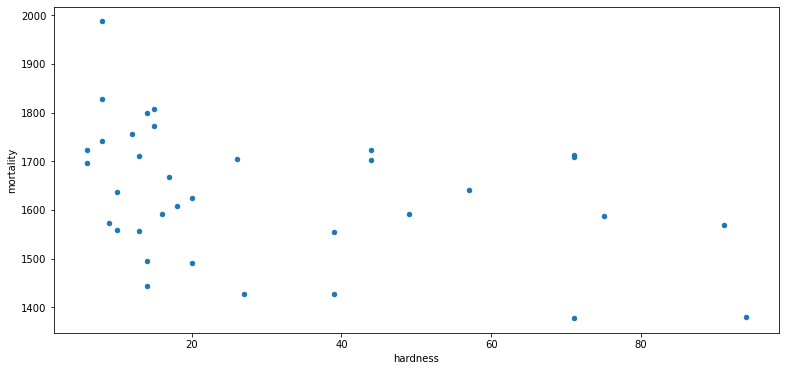

In [193]:
df_north.plot(kind='scatter', x='hardness', y='mortality')

Заметно, что и для южных и для северных городов сохранилась обратная зависимость, но, если для южных городов её 

In [194]:
# Рассчитать коэффициенты корреляции Пирсона и Спирмена
df_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [195]:
df_south[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [196]:
df_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [198]:
df_north[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


По значeниям коэффициентов корреляции можно сказать, что обратная зависимость сохранилась, но, если для южных городов коэффициент корреляции немного меньше значения коэффициента корреляции для всего датасета (-0.602153 & -0.654849), то для северных городов корреляция значительно снизилась (-0.368598 & -0.654849).

In [201]:
# Построить модель линейной регрессии, рассчитать коэффициент детерминации и вывести график остатков
south_X = df_south[['hardness']]
south_y = df_south[['mortality']]
south_X_train, south_X_test, south_y_train, south_y_test = train_test_split(south_X, south_y, test_size=0.25, random_state=5)
model_south = LinearRegression()
model_south.fit(south_X_train, south_y_train)
print(f'k1 = {model_south.coef_[0][0]}, b = {model_south.intercept_[0]}')

k1 = -1.8008178049257602, b = 1522.0867592586749


In [204]:
south_y_pred = model_south.predict(south_X_test)
model_south.score(south_X_test, south_y_test)

0.14827346226249938

Коэффициент детерминации для южных городов значительно меньше, чем для всего датасета, что говорит о том, что качество модели существенно снизилось.

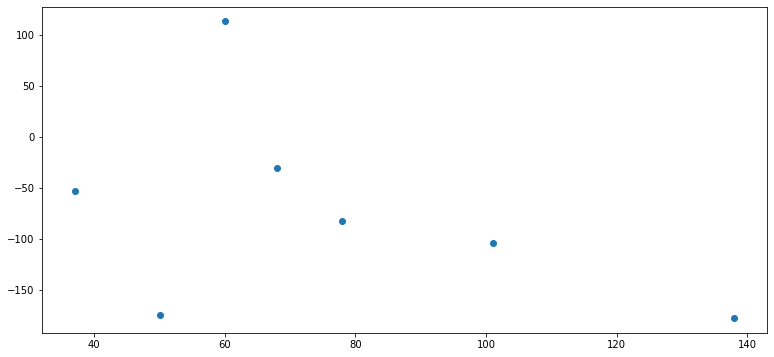

In [209]:
south_residuals = south_y_test - south_y_pred
plt.scatter(south_X_test, south_residuals)

На графике остатков преобладают отрицательные значения, что подтверждает ухудшение качества модели.

In [210]:
north_X = df_north[['hardness']]
north_y = df_north[['mortality']]
north_X_train, north_X_test, north_y_train, north_y_test = train_test_split(north_X, north_y, test_size=0.25, random_state=5)
model_north = LinearRegression()
model_north.fit(north_X_train, north_y_train)
print(f'k1 = {model_north.coef_[0][0]}, b = {model_north.intercept_[0]}')

k1 = -2.193743014211091, b = 1704.0944820821642


In [211]:
north_y_pred = model_north.predict(north_X_test)
model_north.score(north_X_test, north_y_test)

-0.18999356016213298

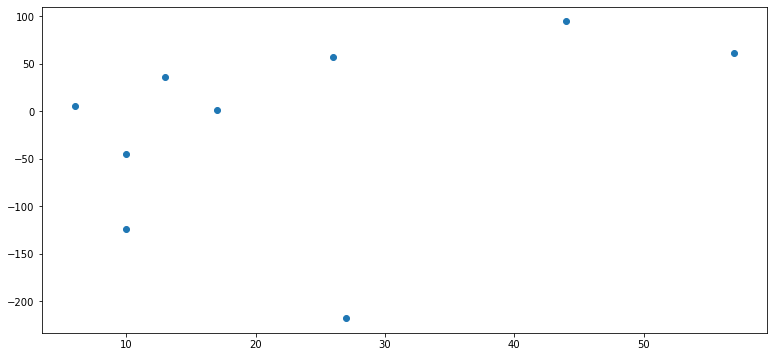

In [212]:
north_residuals = north_y_test - north_y_pred
plt.scatter(north_X_test, north_residuals)

Отрицательное значение коэффициента детерминации, говорит о том, что модель для северных городов ничего не предсказывает.  
Скорее всего, такой результат получился из-за того, что очень мало значений после разделения датасета. Возможно, если собрать больше данных, то в результате модели для южных и северных городов будут точнее общей модели.